In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
COL_1 = 'red'
COL_2 = 'black'

In [3]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

In [4]:
def PlotFeatureByTexp(df, feature, title=None):
    Texp = df['T'].unique()
    nTexp = len(Texp)
    for T in Texp:
        dfT = df[df['T']==T]
        k = dfT['k']
        x = dfT[feature]
        plt.scatter(k,x,s=20,label=f'T={T}')
    if title:
        plt.title(title)
    plt.xlabel('k')
    plt.ylabel(feature)
    plt.xlim(df['k'].min(),df['k'].max())
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left')
    plt.show()

In [5]:
def PlotPxGridOverTime(df, n, S0, S1, title=None):
    i = 0
    S = df.columns
    ii = (S>=S0)&(S<=S1)
    Sii = S[ii]
    while i < len(df):
        T = round(df.index[i],4)
        dfT = df.iloc[i,ii]
        plt.scatter(Sii,dfT,s=5,label=f'tau={T}')
        i += n
    if title:
        plt.title(title)
    plt.xlabel('S')
    plt.ylabel('V')
    plt.xlim(Sii[0],Sii[-1])
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left')
    plt.show()

In [6]:
def PlotExBdryOverTime(b, title=None):
    b.plot(c='k',lw=3,xlabel='tau',ylabel='S*',title=title,legend=None)
    plt.xlim(b.index[0],b.index[-1])
    plt.show()

## Implicit Scheme -- European Option

- nX=1000,nT=1000 has sigErr~1% -- try (1) Crank-Nicolson, (2) gamma boundary condition

In [7]:
df_flatvol = pd.read_csv('test/lattice_eu_acc_flatvol/lattice_eu_acc_flatvol_nX=1000_nT=1000_dk=0.05.csv',comment='#')
df_spxvol = pd.read_csv('test/lattice_eu_acc_spxvol/lattice_eu_acc_spxvol_nX=1000_nT=1000_dk=0.02.csv',comment='#')

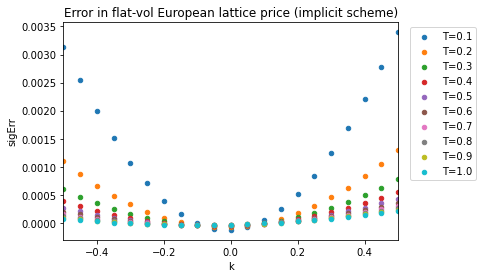

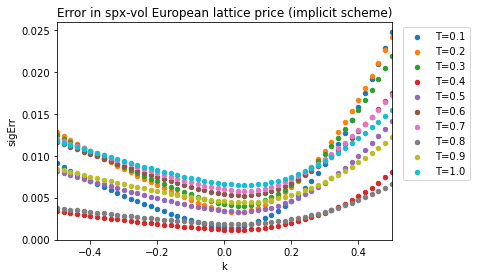

In [8]:
PlotFeatureByTexp(df_flatvol,'sigErr','Error in flat-vol European lattice price (implicit scheme)')
PlotFeatureByTexp(df_spxvol,'sigErr','Error in spx-vol European lattice price (implicit scheme)')

## Implicit Scheme -- European Option PxGrid

- ATM kink in option price under spx-vol

In [9]:
df_atmput_px = pd.read_csv('test/atm_eu_implicit/atm_eu_put_pxgrid_flatvol.csv',index_col=0)
df_atmcall_px = pd.read_csv('test/atm_eu_implicit/atm_eu_call_pxgrid_flatvol.csv',index_col=0)

In [10]:
df_atmput_px.columns = df_atmput_px.columns.astype(float)
df_atmcall_px.columns = df_atmcall_px.columns.astype(float)

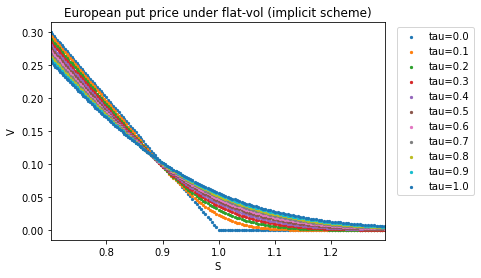

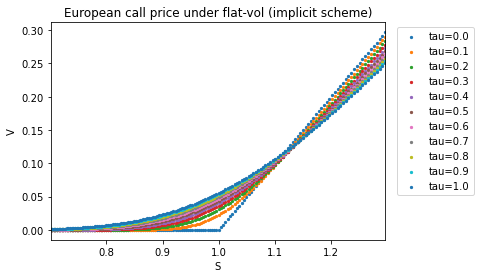

In [11]:
PlotPxGridOverTime(df_atmput_px,100,0.7,1.3,'European put price under flat-vol (implicit scheme)')
PlotPxGridOverTime(df_atmcall_px,100,0.7,1.3,'European call price under flat-vol (implicit scheme)')

In [12]:
df_atmput_px = pd.read_csv('test/atm_eu_implicit/atm_eu_put_pxgrid_spxvol.csv',index_col=0)
df_atmcall_px = pd.read_csv('test/atm_eu_implicit/atm_eu_call_pxgrid_spxvol.csv',index_col=0)

In [13]:
df_atmput_px.columns = df_atmput_px.columns.astype(float)
df_atmcall_px.columns = df_atmcall_px.columns.astype(float)

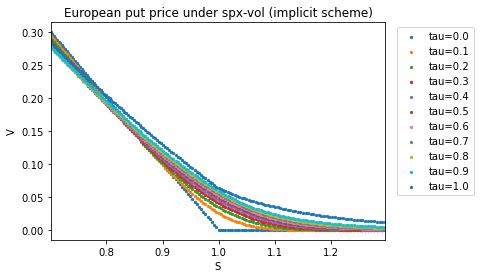

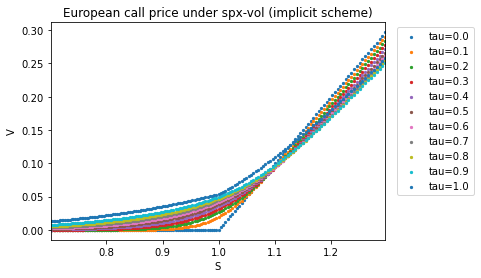

In [14]:
PlotPxGridOverTime(df_atmput_px,100,0.7,1.3,'European put price under spx-vol (implicit scheme)')
PlotPxGridOverTime(df_atmcall_px,100,0.7,1.3,'European call price under spx-vol (implicit scheme)')

## Implicit Scheme -- American Option PxGrid

- ATM kink in option price under spx-vol

In [15]:
df_atmput_px = pd.read_csv('test/atm_am_implicit/atm_am_put_pxgrid_flatvol.csv',index_col=0)
df_atmput_ex = pd.read_csv('test/atm_am_implicit/atm_am_put_exbdry_flatvol.csv',index_col=0)
df_atmcall_px = pd.read_csv('test/atm_am_implicit/atm_am_call_pxgrid_flatvol.csv',index_col=0)
df_atmcall_ex = pd.read_csv('test/atm_am_implicit/atm_am_call_exbdry_flatvol.csv',index_col=0)

In [16]:
df_atmput_px.columns = df_atmput_px.columns.astype(float)
df_atmcall_px.columns = df_atmcall_px.columns.astype(float)

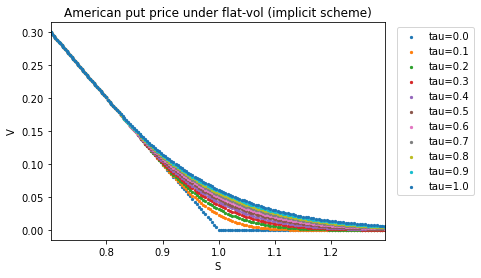

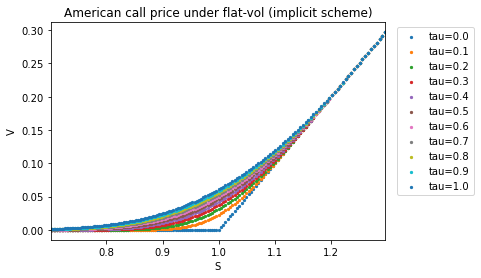

In [17]:
PlotPxGridOverTime(df_atmput_px,100,0.7,1.3,'American put price under flat-vol (implicit scheme)')
PlotPxGridOverTime(df_atmcall_px,100,0.7,1.3,'American call price under flat-vol (implicit scheme)')

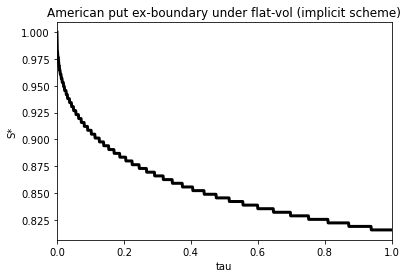

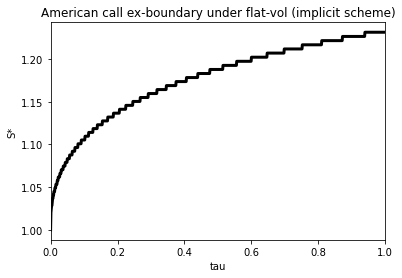

In [18]:
PlotExBdryOverTime(df_atmput_ex,'American put ex-boundary under flat-vol (implicit scheme)')
PlotExBdryOverTime(df_atmcall_ex,'American call ex-boundary under flat-vol (implicit scheme)')

In [19]:
df_atmput_px = pd.read_csv('test/atm_am_implicit/atm_am_put_pxgrid_spxvol.csv',index_col=0)
df_atmput_ex = pd.read_csv('test/atm_am_implicit/atm_am_put_exbdry_spxvol.csv',index_col=0)
df_atmcall_px = pd.read_csv('test/atm_am_implicit/atm_am_call_pxgrid_spxvol.csv',index_col=0)
df_atmcall_ex = pd.read_csv('test/atm_am_implicit/atm_am_call_exbdry_spxvol.csv',index_col=0)

In [20]:
df_atmput_px.columns = df_atmput_px.columns.astype(float)
df_atmcall_px.columns = df_atmcall_px.columns.astype(float)

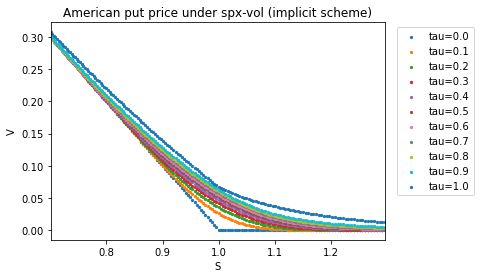

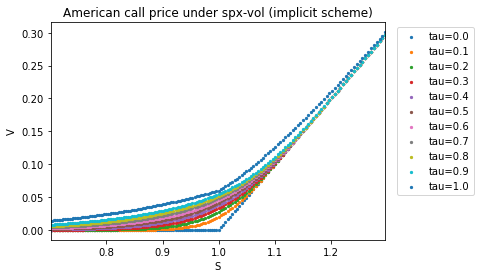

In [21]:
PlotPxGridOverTime(df_atmput_px,100,0.7,1.3,'American put price under spx-vol (implicit scheme)')
PlotPxGridOverTime(df_atmcall_px,100,0.7,1.3,'American call price under spx-vol (implicit scheme)')

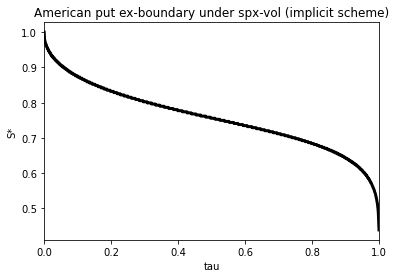

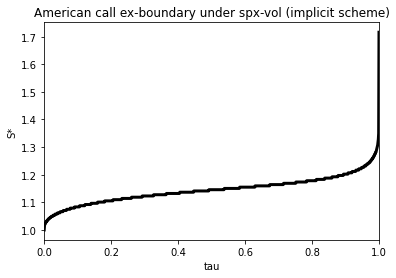

In [22]:
PlotExBdryOverTime(df_atmput_ex,'American put ex-boundary under spx-vol (implicit scheme)')
PlotExBdryOverTime(df_atmcall_ex,'American call ex-boundary under spx-vol (implicit scheme)')

## Crank-Nicolson Scheme -- European Option

In [23]:
df_flatvol = pd.read_csv('test/lattice_eu_acc_flatvol/lattice_eu_acc_flatvol_nX=1000_nT=1000_x=1_dk=0.05_m=crank-nicolson.csv',comment='#')
df_spxvol = pd.read_csv('test/lattice_eu_acc_spxvol/lattice_eu_acc_spxvol_nX=1000_nT=1000_x=1_dk=0.02_m=crank-nicolson.csv',comment='#')

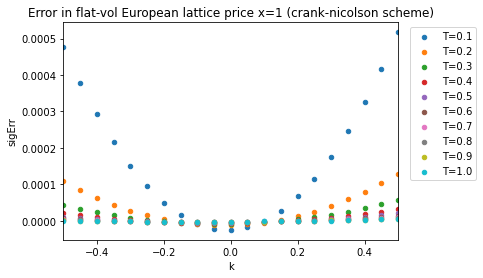

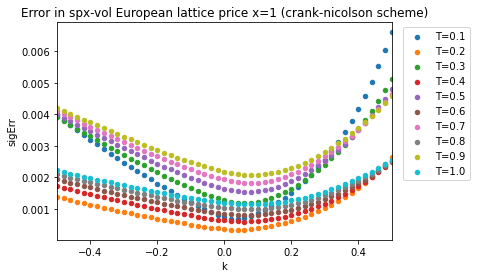

In [24]:
PlotFeatureByTexp(df_flatvol,'sigErr','Error in flat-vol European lattice price x=1 (crank-nicolson scheme)')
PlotFeatureByTexp(df_spxvol,'sigErr','Error in spx-vol European lattice price x=1 (crank-nicolson scheme)')

In [25]:
df_flatvol = pd.read_csv('test/lattice_eu_acc_flatvol/lattice_eu_acc_flatvol_nX=1000_nT=1000_dk=0.05_m=crank-nicolson.csv',comment='#')
df_spxvol = pd.read_csv('test/lattice_eu_acc_spxvol/lattice_eu_acc_spxvol_nX=1000_nT=1000_dk=0.02_m=crank-nicolson.csv',comment='#')

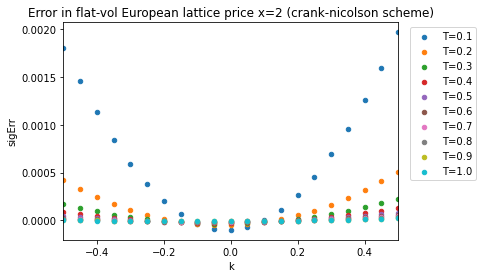

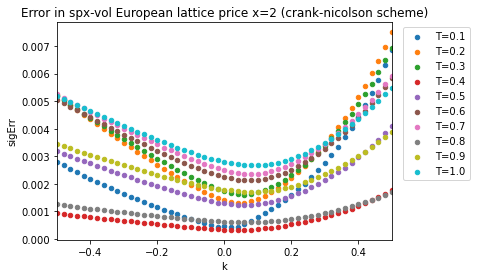

In [26]:
PlotFeatureByTexp(df_flatvol,'sigErr','Error in flat-vol European lattice price x=2 (crank-nicolson scheme)')
PlotFeatureByTexp(df_spxvol,'sigErr','Error in spx-vol European lattice price x=2 (crank-nicolson scheme)')

In [27]:
df_flatvol = pd.read_csv('test/lattice_eu_acc_flatvol/lattice_eu_acc_flatvol_nX=1000_nT=1000_G=5_dk=0.05_m=crank-nicolson.csv',comment='#')
df_spxvol = pd.read_csv('test/lattice_eu_acc_spxvol/lattice_eu_acc_spxvol_nX=1000_nT=1000_G=5_dk=0.02_m=crank-nicolson.csv',comment='#')

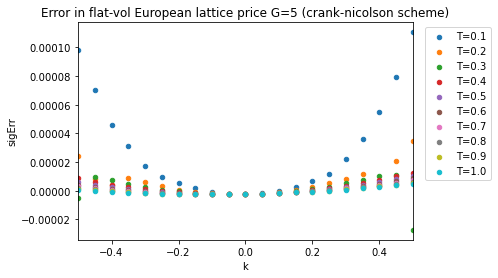

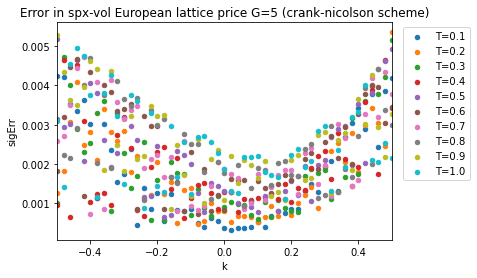

In [28]:
PlotFeatureByTexp(df_flatvol,'sigErr','Error in flat-vol European lattice price G=5 (crank-nicolson scheme)')
PlotFeatureByTexp(df_spxvol,'sigErr','Error in spx-vol European lattice price G=5 (crank-nicolson scheme)')

In [29]:
df_flatvol = pd.read_csv('test/lattice_eu_acc_flatvol/lattice_eu_acc_flatvol_nX=1000_nT=1000_G=6_dk=0.05_m=crank-nicolson.csv',comment='#')
df_spxvol = pd.read_csv('test/lattice_eu_acc_spxvol/lattice_eu_acc_spxvol_nX=1000_nT=1000_G=6_dk=0.02_m=crank-nicolson.csv',comment='#')

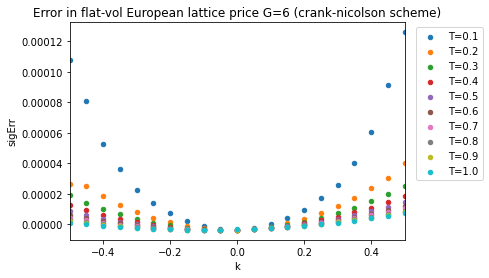

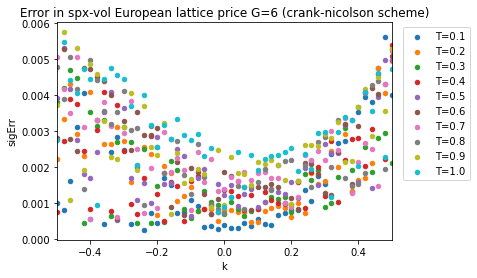

In [30]:
PlotFeatureByTexp(df_flatvol,'sigErr','Error in flat-vol European lattice price G=6 (crank-nicolson scheme)')
PlotFeatureByTexp(df_spxvol,'sigErr','Error in spx-vol European lattice price G=6 (crank-nicolson scheme)')

## Crank-Nicolson Scheme -- Gamma Boundary Condition

In [31]:
df_flatvol = pd.read_csv('test/lattice_eu_acc_flatvol/lattice_eu_acc_flatvol_nX=1000_nT=1000_G=5_dk=0.05_m=crank-nicolson_b=gamma.csv',comment='#')
df_spxvol = pd.read_csv('test/lattice_eu_acc_spxvol/lattice_eu_acc_spxvol_nX=1000_nT=1000_G=5_dk=0.02_m=crank-nicolson_b=gamma.csv',comment='#')

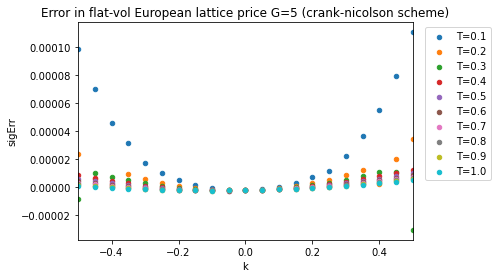

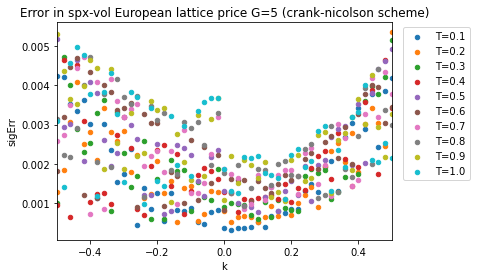

In [32]:
PlotFeatureByTexp(df_flatvol,'sigErr','Error in flat-vol European lattice price G=5 (crank-nicolson scheme)')
PlotFeatureByTexp(df_spxvol,'sigErr','Error in spx-vol European lattice price G=5 (crank-nicolson scheme)')

## Crank-Nicolson Scheme -- American Option

- DEBUG: put under spx-vol -- distortion in intrinsic-value when S is deep ITM

In [33]:
df_atmput_px = pd.read_csv('test/atm_am_crank-nicolson/atm_am_put_pxgrid_flatvol_m=crank-nicolson_b=gamma.csv',index_col=0)
df_atmput_ex = pd.read_csv('test/atm_am_crank-nicolson/atm_am_put_exbdry_flatvol_m=crank-nicolson_b=gamma.csv',index_col=0)
df_atmcall_px = pd.read_csv('test/atm_am_crank-nicolson/atm_am_call_pxgrid_flatvol_m=crank-nicolson_b=gamma.csv',index_col=0)
df_atmcall_ex = pd.read_csv('test/atm_am_crank-nicolson/atm_am_call_exbdry_flatvol_m=crank-nicolson_b=gamma.csv',index_col=0)

In [34]:
df_atmput_px.columns = df_atmput_px.columns.astype(float)
df_atmcall_px.columns = df_atmcall_px.columns.astype(float)

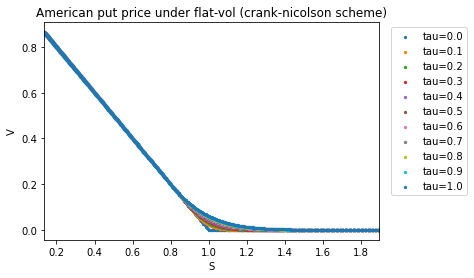

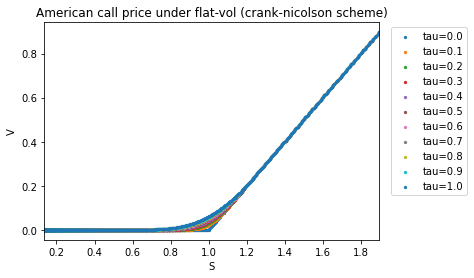

In [35]:
PlotPxGridOverTime(df_atmput_px,100,0.1,1.9,'American put price under flat-vol (crank-nicolson scheme)')
PlotPxGridOverTime(df_atmcall_px,100,0.1,1.9,'American call price under flat-vol (crank-nicolson scheme)')

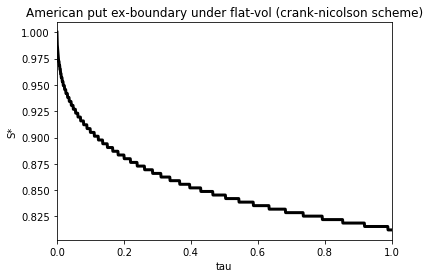

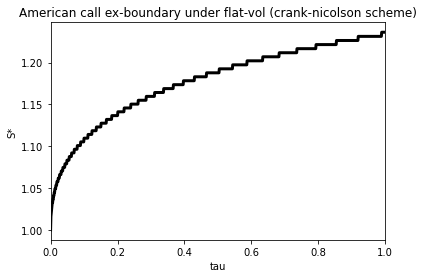

In [36]:
PlotExBdryOverTime(df_atmput_ex,'American put ex-boundary under flat-vol (crank-nicolson scheme)')
PlotExBdryOverTime(df_atmcall_ex,'American call ex-boundary under flat-vol (crank-nicolson scheme)')

In [37]:
df_atmput_px = pd.read_csv('test/atm_am_crank-nicolson/atm_am_put_pxgrid_spxvol_m=crank-nicolson_b=gamma.csv',index_col=0)
df_atmput_ex = pd.read_csv('test/atm_am_crank-nicolson/atm_am_put_exbdry_spxvol_m=crank-nicolson_b=gamma.csv',index_col=0)
df_atmcall_px = pd.read_csv('test/atm_am_crank-nicolson/atm_am_call_pxgrid_spxvol_m=crank-nicolson_b=gamma.csv',index_col=0)
df_atmcall_ex = pd.read_csv('test/atm_am_crank-nicolson/atm_am_call_exbdry_spxvol_m=crank-nicolson_b=gamma.csv',index_col=0)

In [38]:
df_atmput_px.columns = df_atmput_px.columns.astype(float)
df_atmcall_px.columns = df_atmcall_px.columns.astype(float)

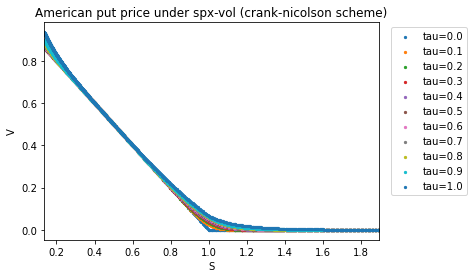

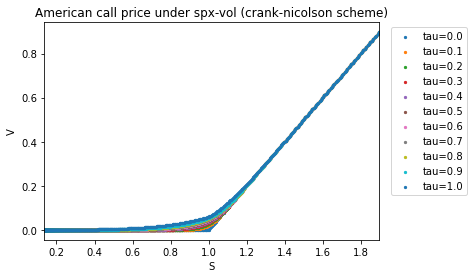

In [39]:
PlotPxGridOverTime(df_atmput_px,100,0.1,1.9,'American put price under spx-vol (crank-nicolson scheme)')
PlotPxGridOverTime(df_atmcall_px,100,0.1,1.9,'American call price under spx-vol (crank-nicolson scheme)')

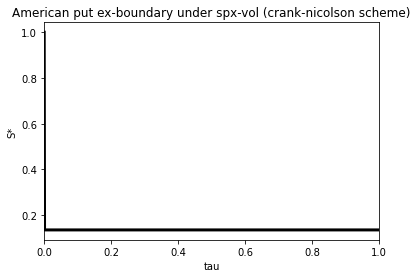

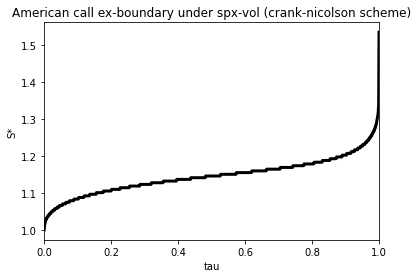

In [40]:
PlotExBdryOverTime(df_atmput_ex,'American put ex-boundary under spx-vol (crank-nicolson scheme)')
PlotExBdryOverTime(df_atmcall_ex,'American call ex-boundary under spx-vol (crank-nicolson scheme)')